1. Mobile price prediction

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Data_test = pd.read_csv('/content/drive/MyDrive/Mobiletest1.csv')

In [4]:
Data_train = pd.read_csv('/content/drive/MyDrive/Mobile_train1.csv')

In [5]:
Data_test.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

In [6]:
Data_train.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [7]:
Data_train.shape
# Size of training data

(2000, 21)

In [8]:
Data_test.shape
# Size of testing data

(1000, 21)

In [9]:
Data_train.isnull().sum()
# No null values

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [10]:
Data_test.isnull().sum()
# No null values in testing data

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [11]:
X = Data_train.drop('price_range',axis=1)
print(X.shape)
y = Data_train['price_range']
print(y.shape)

(2000, 20)
(2000,)


In [12]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

In [13]:
model = keras.Sequential([keras.layers.Dense(100,input_shape=(20,),activation = 'relu'), keras.layers.Dense(10,activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics =['accuracy'])

model.fit(X_scaled,y,epochs = 50)

Epoch 1/50
63/63 [==============================] - 1s 2ms/step - loss: 1.7633 - accuracy: 0.3495
Epoch 2/50
63/63 [==============================] - 0s 2ms/step - loss: 1.1478 - accuracy: 0.5860
Epoch 3/50
63/63 [==============================] - 0s 2ms/step - loss: 0.8882 - accuracy: 0.7045
Epoch 4/50
63/63 [==============================] - 0s 2ms/step - loss: 0.7295 - accuracy: 0.7810
Epoch 5/50
63/63 [==============================] - 0s 2ms/step - loss: 0.6186 - accuracy: 0.8280
Epoch 6/50
63/63 [==============================] - 0s 2ms/step - loss: 0.5359 - accuracy: 0.8705
Epoch 7/50
63/63 [==============================] - 0s 3ms/step - loss: 0.4706 - accuracy: 0.8940
Epoch 8/50
63/63 [==============================] - 0s 3ms/step - loss: 0.4183 - accuracy: 0.9145
Epoch 9/50
63/63 [==============================] - 0s 3ms/step - loss: 0.3741 - accuracy: 0.9210
Epoch 10/50
63/63 [==============================] - 0s 3ms/step - loss: 0.3375 - accuracy: 0.9420
Epoch 11/50
63/63 [

In [14]:
X_test = Data_test.drop('id',axis=1)
y_predicted = model.predict(X_test)
y_predicted

32/32 [==============================] - 0s 1ms/step


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

2. Fashion_MNIST Dataset

In [16]:
#Data = keras.datasets.fashion_mnist

(X_train,y_train),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [17]:
len(X_train)

60000

In [18]:
len(X_test)

10000

In [19]:
X_train[0].shape

(28, 28)

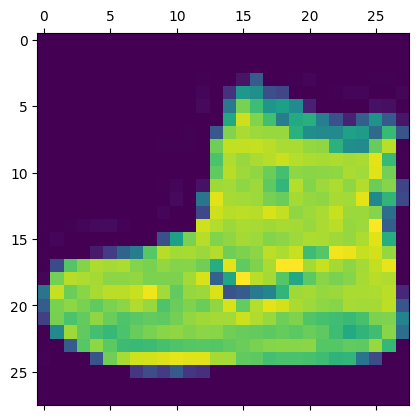

In [20]:
plt.matshow(X_train[0])

In [21]:
y_train[0]

9

In [22]:
X_train[0]
# Data is not scaled

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [23]:
# Scaling the data

X_train = X_train/255
X_test = X_test/255

In [24]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [25]:
X_train_flattened.shape

(60000, 784)

In [26]:
X_train_flattened[0]
# Data is scaled

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [27]:
model = keras.Sequential([keras.layers.Dense(100,input_shape=(784,),activation = 'relu'), keras.layers.Dense(10,activation='sigmoid')])

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics =['accuracy'])

model.fit(X_train_flattened,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5070 - accuracy: 0.8212
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3796 - accuracy: 0.8649
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3416 - accuracy: 0.8765
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3182 - accuracy: 0.8832
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2997 - accuracy: 0.8902


In [28]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3694 - accuracy: 0.8663


[0.3693709969520569, 0.8662999868392944]

In [29]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([4.1528051e-03, 6.9629139e-04, 6.4247888e-06, 2.0021744e-04,
       1.7477351e-04, 4.8479566e-01, 3.3643717e-04, 9.7171873e-01,
       6.4198421e-03, 9.9918032e-01], dtype=float32)

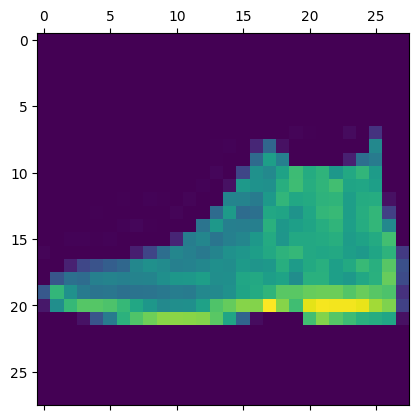

In [30]:
plt.matshow(X_test[0])

In [31]:
np.argmax(y_predicted[0])

9

In [32]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [33]:
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[767,   2,  25,  93,   9,   1,  97,   0,   6,   0],
       [  1, 972,   0,  22,   3,   0,   1,   0,   1,   0],
       [ 17,   0, 717,  18, 204,   0,  43,   0,   1,   0],
       [  7,   7,   9, 923,  38,   0,  13,   0,   3,   0],
       [  0,   1,  52,  32, 887,   0,  26,   0,   2,   0],
       [  0,   0,   0,   1,   0, 923,   0,  35,   1,  40],
       [108,   1,  85,  64, 146,   0, 588,   0,   8,   0],
       [  0,   0,   0,   0,   0,   6,   0, 949,   0,  45],
       [  6,   0,   5,   5,   8,   2,   2,   4, 968,   0],
       [  0,   0,   0,   0,   0,   0,   1,  30,   0, 969]], dtype=int32)>

In [34]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot = True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(95.72222222222221, 0.5, 'Truth')

3. Penguins Dataset

In [35]:
Data = pd.read_csv('/content/drive/MyDrive/penguins_Data5.csv')

In [36]:
Data.head()

rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen            39.1           18.7              181.0   
1      2  Adelie  Torgersen            39.5           17.4              186.0   
2      3  Adelie  Torgersen            40.3           18.0              195.0   
3      4  Adelie  Torgersen             NaN            NaN                NaN   
4      5  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

In [37]:
Data.shape

(344, 9)

In [38]:
Data.isnull().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [39]:
data = Data.dropna(how='any')
data.shape

(333, 9)

In [40]:
data.isnull().sum()

rowid                0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [41]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

newcolumn = encoder.fit_transform(data.species)

new = encoder.fit_transform(data.sex)

data['Species'] = newcolumn
data['Sex'] = new

<ipython-input-41-42a2d3025064>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Species'] = newcolumn
<ipython-input-41-42a2d3025064>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = new


In [42]:
data.drop('species',axis=1,inplace=True)
data.drop('sex',axis=1,inplace=True)

<ipython-input-42-006aa8a29cb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('species',axis=1,inplace=True)
<ipython-input-42-006aa8a29cb1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('sex',axis=1,inplace=True)


In [43]:
data.head()

rowid     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Torgersen            39.1           18.7              181.0   
1      2  Torgersen            39.5           17.4              186.0   
2      3  Torgersen            40.3           18.0              195.0   
4      5  Torgersen            36.7           19.3              193.0   
5      6  Torgersen            39.3           20.6              190.0   

   body_mass_g  year  Species  Sex  
0       3750.0  2007        0    1  
1       3800.0  2007        0    0  
2       3250.0  2007        0    0  
4       3450.0  2007        0    0  
5       3650.0  2007        0    1

In [44]:
print(data['Species'].unique())
print(data['Sex'].unique())

[0 2 1]
[1 0]


In [45]:
X = data.iloc[:,[2,3,4,5,8]]
Y = data['Species']
X.head()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  Sex
0            39.1           18.7              181.0       3750.0    1
1            39.5           17.4              186.0       3800.0    0
2            40.3           18.0              195.0       3250.0    0
4            36.7           19.3              193.0       3450.0    0
5            39.3           20.6              190.0       3650.0    1

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=25)

In [47]:
model = keras.Sequential([keras.layers.Dense(100,input_shape=(5,),activation = 'relu'), keras.layers.Dense(10,activation='sigmoid')])

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics =['accuracy'])

model.fit(X_train,y_train,epochs = 180)

Epoch 1/180
9/9 [==============================] - 1s 2ms/step - loss: 707.6618 - accuracy: 0.0038 
Epoch 2/180
9/9 [==============================] - 0s 3ms/step - loss: 214.6487 - accuracy: 0.3722
Epoch 3/180
9/9 [==============================] - 0s 2ms/step - loss: 43.3179 - accuracy: 0.3985
Epoch 4/180
9/9 [==============================] - 0s 4ms/step - loss: 47.2948 - accuracy: 0.4023
Epoch 5/180
9/9 [==============================] - 0s 3ms/step - loss: 18.7081 - accuracy: 0.3421
Epoch 6/180
9/9 [==============================] - 0s 2ms/step - loss: 11.0151 - accuracy: 0.3872
Epoch 7/180
9/9 [==============================] - 0s 2ms/step - loss: 7.0919 - accuracy: 0.2782
Epoch 8/180
9/9 [==============================] - 0s 3ms/step - loss: 3.8781 - accuracy: 0.2256
Epoch 9/180
9/9 [==============================] - 0s 2ms/step - loss: 5.5950 - accuracy: 0.3609
Epoch 10/180
9/9 [==============================] - 0s 2ms/step - loss: 6.9102 - accuracy: 0.3496
Epoch 11/180
9/9 [==

In [48]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 1s 6ms/step - loss: 3.9546 - accuracy: 0.5522


[3.954617738723755, 0.5522388219833374]

In [49]:
y_predicted = model.predict(X_test)

3/3 [==============================] - 0s 3ms/step


In [50]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]


In [51]:
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[29,  0,  0],
       [15,  0,  0],
       [23,  0,  0]], dtype=int32)>

4. Heart Dataset

In [52]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/heart.csv')
data.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [53]:
from sklearn.model_selection import train_test_split

def readTrainTestData():
  names = ['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall','output']
  path = ('/content/drive/MyDrive/heart.csv')
  df = pd.read_csv(path, names=names,header=0)

  columns_norm = ['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']

  X_Data = df[columns_norm]
  X_Data = X_Data.apply(lambda x:( (x - x.min()) / (x.max()-x.min())))

  Y_Data = df["output"]
  X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data, test_size=0.3 ,random_state=42)

  return X_Train, X_Test, Y_Train, Y_Test

In [54]:
from tensorflow import feature_column
import tensorflow as tf

def create_feature_column():
  age = tf.feature_column.numeric_column('age')
  sex = tf.feature_column.numeric_column('sex')
  cp = tf.feature_column.numeric_column('cp')
  trtbps = tf.feature_column.numeric_column('trtbps')
  chol = tf.feature_column.numeric_column('chol')
  fbs = tf.feature_column.numeric_column('fbs')
  restecg = tf.feature_column.numeric_column('restecg')
  thalachh = tf.feature_column.numeric_column('thalachh')
  exng = tf.feature_column.numeric_column('exng')
  oldpeak = tf.feature_column.numeric_column('oldpeak')
  slp = tf.feature_column.numeric_column('slp')
  caa = tf.feature_column.numeric_column('caa')
  thall = tf.feature_column.numeric_column('thall')


  feature_column = [age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall]

  return feature_column

In [55]:
X_Train, X_Test, Y_Train, Y_Test = readTrainTestData()
feature_column = create_feature_column()

input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x = X_Train, y=Y_Train, batch_size=40, num_epochs=1000, shuffle=True)

eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_Test, y=Y_Test, batch_size=40, num_epochs=1, shuffle=False)

predict_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_Test, num_epochs=1, shuffle=True)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.

Instructions for updating:
Use tf.keras instead.


In [56]:
model = tf.estimator.LinearClassifier(feature_columns=feature_column, n_classes=3)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


In [57]:
history = model.train(input_fn=input_func, steps=1000)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras i

In [58]:
results = model.evaluate(eval_input_func)

Instructions for updating:
Use tf.keras instead.


In [59]:
results["accuracy"]

0.8021978